# NFインド株 (Nifty 50) ETF 日足

In [20]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [21]:
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [22]:
pattern = re.compile(r'(.+)\.T')

symbol = '1678.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-03-25 00:00:00+09:00,344.885683,344.885683,342.818726,342.818726,1725630,0.0,0.0,0.0
2024-03-26 00:00:00+09:00,343.212444,344.590406,343.114012,344.491974,1171340,0.0,0.0,0.0
2024-03-27 00:00:00+09:00,344.491998,346.952655,343.999866,346.362091,1230600,0.0,0.0,0.0
2024-03-28 00:00:00+09:00,346.362071,348.429029,345.476241,348.330597,1393140,0.0,0.0,0.0
2024-03-29 00:00:00+09:00,348.822736,349.413300,348.429037,348.724304,1369330,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-18 00:00:00+09:00,325.000000,328.000000,324.600006,327.700012,1657490,0.0,0.0,0.0
2025-03-19 00:00:00+09:00,328.000000,330.600006,327.299988,330.000000,2532600,0.0,0.0,0.0
2025-03-21 00:00:00+09:00,332.299988,336.799988,331.799988,336.500000,3153800,0.0,0.0,0.0


In [23]:
df0 = ticker.history(period='2y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-03-27 00:00:00+09:00,239.175862,239.175862,236.813638,238.683731,859500,0.0,0.0,0.0
2023-03-28 00:00:00+09:00,239.668005,239.963287,237.699479,238.486893,354300,0.0,0.0,0.0
2023-03-29 00:00:00+09:00,238.388447,240.750687,238.388447,240.750687,416400,0.0,0.0,0.0
2023-03-30 00:00:00+09:00,242.325497,243.605042,242.325497,243.605042,390900,0.0,0.0,0.0
2023-03-31 00:00:00+09:00,245.179879,247.049973,245.179879,247.049973,523800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-18 00:00:00+09:00,325.000000,328.000000,324.600006,327.700012,1657490,0.0,0.0,0.0
2025-03-19 00:00:00+09:00,328.000000,330.600006,327.299988,330.000000,2532600,0.0,0.0,0.0
2025-03-21 00:00:00+09:00,332.299988,336.799988,331.799988,336.500000,3153800,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

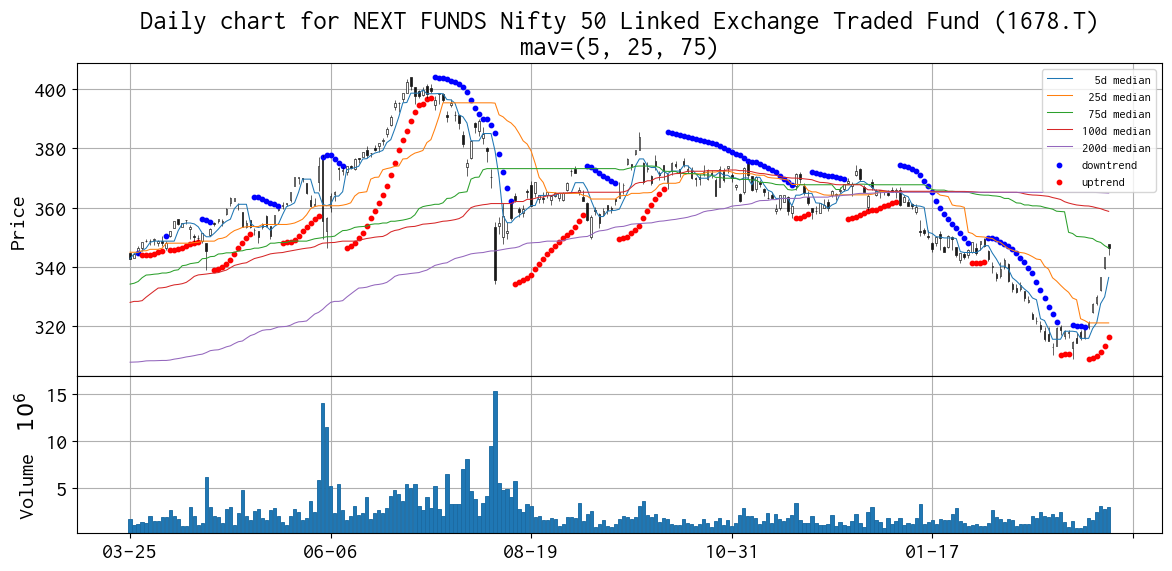

In [24]:
dict_psar = psar(df)

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=10,
        color='blue',
        label='downtrend',
        ax=ax[0]
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=10,
        color='red',
        label='uptrend',
        ax=ax[0]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax[0].legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [25]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-25 00:00:00+09:00,347.600006,347.899994,344.100006,346.399994,3042930,0.0,0.0,0.0


In [26]:
df.tail(2)['Close']

Date
2025-03-24 00:00:00+09:00    343.399994
2025-03-25 00:00:00+09:00    346.399994
Name: Close, dtype: float64

In [27]:
df.tail(2)['Close'].diff()

Date
2025-03-24 00:00:00+09:00    NaN
2025-03-25 00:00:00+09:00    3.0
Name: Close, dtype: float64

In [28]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-24 00:00:00+09:00    331.760004
2025-03-25 00:00:00+09:00    336.800000
Name: Close, dtype: float64

In [29]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-03-24 00:00:00+09:00    323.924001
2025-03-25 00:00:00+09:00    324.368002
Name: Close, dtype: float64